In [1]:
%load_ext autoreload
%autoreload 2

import os
import yaml
import time
import pickle 
import warnings
import scipy
import scipy.sparse.linalg
from collections import defaultdict

from numpy import matrix, asmatrix
from scipy.sparse.sputils import asmatrix

import random
import numpy as np
import fastmat as fm  # need 0.2a3 or later?

import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
from pylab import rcParams
from matplotlib import container
from matplotlib import pyplot as plt
from IPython.core.display import  HTML

import os, sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.environ['PRJ'] = "/Users/ymohit/skigp/"


#from src.nmpy.solvers import cg
random.seed(1337)
np.random.seed(1337)

import os 
import decimal
from collections import defaultdict
# create a new context for this task
ctx = decimal.Context()

# 20 digits should be enough for everyone :D
ctx.prec = 4

def float_to_str(f):
    """
    Convert the given float to a string,
    without resorting to scientific notation
    """
    d1 = ctx.create_decimal(repr(f))
    return format(d1, 'f')

In [2]:
# Importing required packages 

from fkigp.configs import GridSizeFunc

from experiments.plotting import plot_attribute_gs as plot_attribute
from experiments.plotting import get_fmt, M_rep, attributes

In [3]:
class PrecipitationDataDump(object):
    
    def __init__(self, fname):
        self.fname = fname
        self.data = None 
        assert os.path.exists(fname), fname + " does not exists!"
        self.extract_values(fname)
        
    def extract_values(self, fname):
        assert os.path.exists(fname), fname
        self.data = yaml.load(open(fname))

    def get_att(self, att_name='#iters'):
        attributes = ['#iters', "time/iter", 'total', "time-preprocess", 'inf_time', 'grid_size']
        
        if att_name == attributes[0]:
            return self.data['num_iters']
        elif att_name == attributes[1]:
            return self.data['inf_time'] / self.data['num_iters']
        elif att_name == attributes[2]:
            return self.data['inf_time'] + self.data['pre_time']
        elif att_name == attributes[3]:
            return self.data['pre_time']
        elif att_name == attributes[4]:
            return self.data['inf_time']
        elif att_name == attributes[5]:
            return self.data['grid_size']
        else:
            raise NotImplementedError

In [4]:
def read_dumps(class_, sweep_id = 'pwe8kptd'):
        
    log_dir_path = os.environ['PRJ'] + 'logs/precipitation/' + sweep_id 

    assert os.path.exists(log_dir_path) == True

    runs = [log_dir_path + '/' + fname + '/results.yaml' for fname in os.listdir(log_dir_path) if fname.startswith('rid')]

    seeds = [1, 23, 67, 971, 23427, 431241, 2423717, 9871]
    dumps = {}
    for run in runs:
        dump = class_(run)
        data = dump.data
        run_index = seeds.index(data['seed'])
        dumps[(data['grid_size'], run_index, methods[data['method']-1])] = dump
    return dumps

methods = ['kissgp', 'gsgp']
dumps = read_dumps(PrecipitationDataDump, sweep_id = 'pwe8kptd')

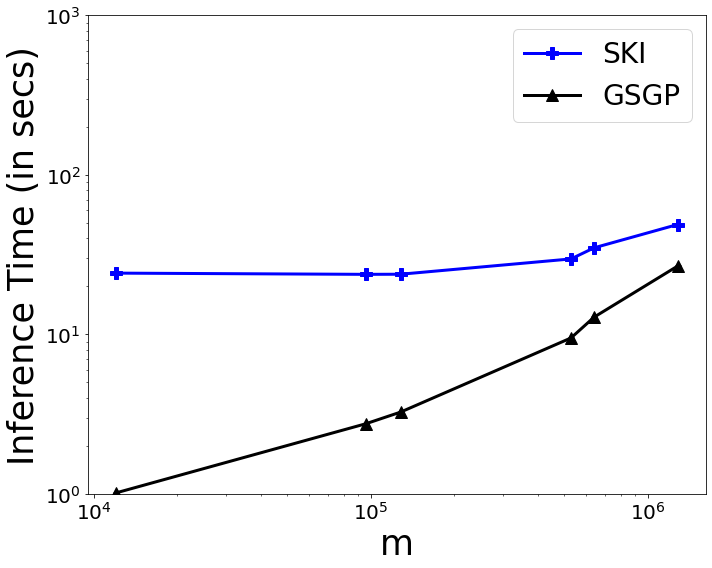

In [5]:
plot_attribute(dumps,attribute='inf_time', x_logscale=True, y_logscale=True, show_legends=True,
              set_zero_min_y_limit=True, x_label='m', y_label = 'Inference Time (in secs)',
              set_y_limit=-50)

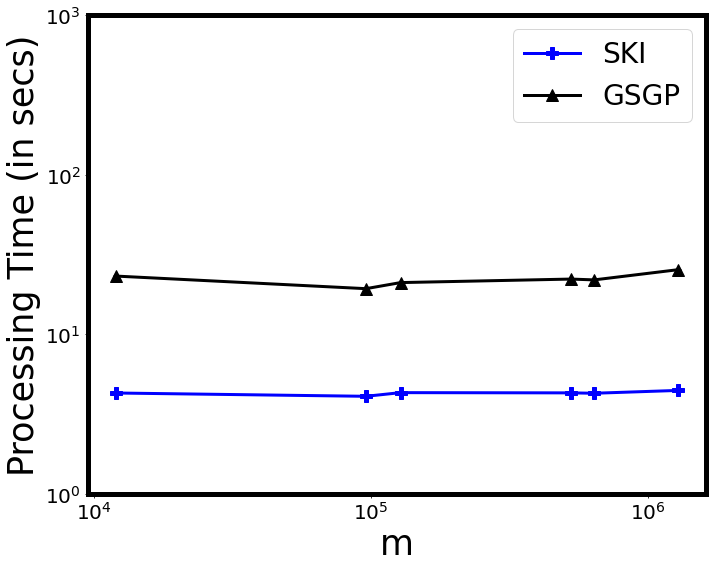

In [6]:
plot_attribute(dumps,attribute='time-preprocess', x_logscale=True, y_logscale=True,
              set_zero_min_y_limit=True, x_label='m', y_label = 'Processing Time (in secs)',
              set_y_limit=-50, 
              show_legends=True)

In [ ]:
# Load dumps corresponding to llk 
# llk_dumps = read_dumps(PrecipitationDataDump, sweep_id = 'llk_sweepid')
# plot_attribute(dumps,attribute='inf_time', x_logscale=True, y_logscale=True, print_values=True,
#               x_label='m', y_label = 'Log-det Time (in secs)',
#              set_y_limit=-50, show_legends=True)